<a href="https://colab.research.google.com/github/sathizz7/Guvi_Task_5/blob/main/Take_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [467]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

#Analysing Data

In [468]:
d1 = pd.read_csv('takehome_users.csv',encoding= 'ISO-8859-1')   ##Load data

In [469]:
d2 = pd.read_csv('takehome_user_engagement.csv')           ##Load data

In [470]:
d1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [471]:
d2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [472]:
d1.shape

(12000, 10)

In [473]:
d2.shape

(207917, 3)

Missing Values

In [474]:
d1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [475]:
d2.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [476]:
d1['object_id'].unique()

array([    1,     2,     3, ..., 11998, 11999, 12000])

In [477]:
d2['user_id'].unique()

array([    1,     2,     3, ..., 11998, 11999, 12000])

In [478]:
obj = d2.groupby('user_id')['time_stamp']

In [479]:
obj.get_group(2)

1     2013-11-15 03:45:04
2     2013-11-29 03:45:04
3     2013-12-09 03:45:04
4     2013-12-25 03:45:04
5     2013-12-31 03:45:04
6     2014-01-08 03:45:04
7     2014-02-03 03:45:04
8     2014-02-08 03:45:04
9     2014-02-09 03:45:04
10    2014-02-13 03:45:04
11    2014-02-16 03:45:04
12    2014-03-09 03:45:04
13    2014-03-13 03:45:04
14    2014-03-31 03:45:04
Name: time_stamp, dtype: object

Correlation in data

In [480]:
d1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [481]:
corr = d1.corr().round(2)
corr

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,1.00,0.02,-0.03,-0.02,0.00,0.02
last_session_creation_time,0.02,1.00,0.01,0.01,0.04,0.01
opted_in_to_mailing_list,-0.03,0.01,1.00,0.48,0.00,0.00
enabled_for_marketing_drip,-0.02,0.01,0.48,1.00,0.01,0.00
org_id,0.00,0.04,0.00,0.01,1.00,-0.06
invited_by_user_id,0.02,0.01,0.00,0.00,-0.06,1.00


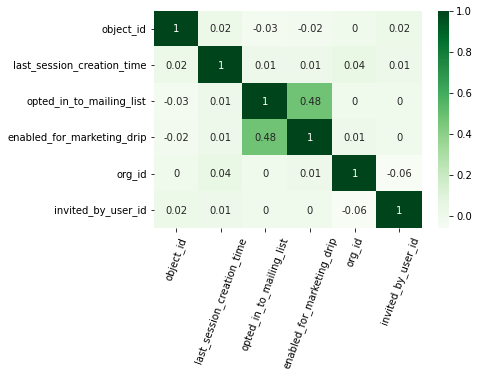

In [482]:
sns.heatmap(corr,annot = True, cmap = 'Greens')
plt.xticks(rotation = 70)
plt.show()

In [483]:
d1['creation_time'].unique()

array(['2014-04-22 03:53:30', '2013-11-15 03:45:04',
       '2013-03-19 23:14:52', ..., '2014-04-27 12:45:16',
       '2012-05-31 11:55:59', '2014-01-26 08:57:12'], dtype=object)

In [484]:
d1.creation_time = pd.to_datetime(d1.creation_time)
d1['year'] = d1.creation_time.dt.year

In [485]:
d1.creation_time = pd.to_datetime(d1.creation_time)
d1['month'] = d1.creation_time.dt.month

In [486]:
d1.year.unique()

array([2014, 2013, 2012])

<function matplotlib.pyplot.show(*args, **kw)>

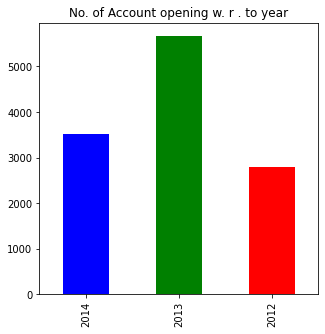

In [487]:
d1.year.value_counts(sort = False).plot(kind = 'bar',color = ['blue', 'green', 'red'],figsize = (5,5))
plt.title('No. of Account opening w. r . to year')
plt.show

Text(0.5, 1.0, 'Account opening months in every year')

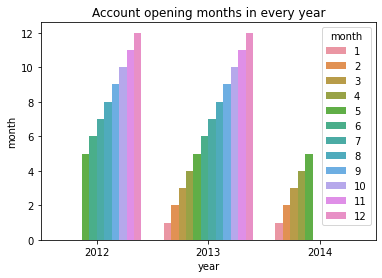

In [488]:
sns.barplot(x = d1['year'], y = d1['month'], hue = 'month',data = d1,)
plt.title('Account opening months in every year')

In [489]:
d1['opted_in_to_mailing_list'].unique()

array([1, 0])

Text(0.5, 1.0, 'Trend in user type over the yeaars')

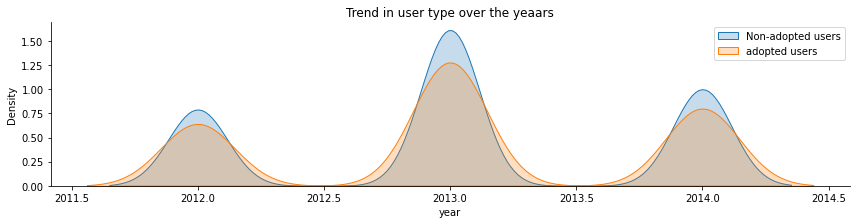

In [490]:
sns.FacetGrid(d1, hue='opted_in_to_mailing_list', aspect=4).map(sns.kdeplot, 'year', shade=True)
plt.legend(labels=['Non-adopted users', 'adopted users'])
plt.title("Trend in user type over the yeaars")

Text(0.5, 1.0, 'Trend in users enabling for marketing drip')

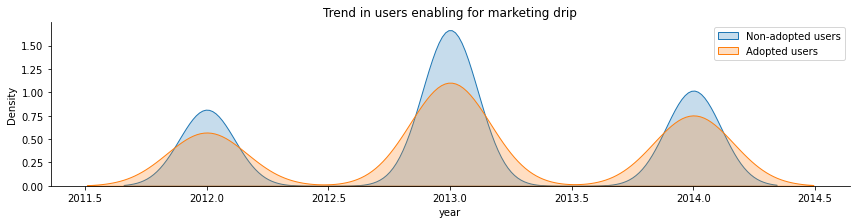

In [491]:
sns.FacetGrid(d1, hue='enabled_for_marketing_drip', aspect=4).map(sns.kdeplot, 'year', shade=True)
plt.legend(labels=['Non-adopted users', "Adopted users"])
plt.title("Trend in users enabling for marketing drip")

In [492]:
d1.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

Text(0.5, 1.0, "Trend in user's creation source")

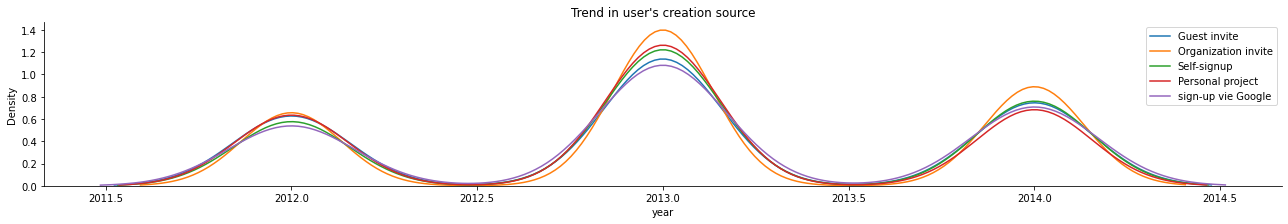

In [493]:
sns.FacetGrid(d1, hue ='creation_source',aspect = 6 ).map(sns.kdeplot, 'year', )
plt.legend(labels=['Guest invite', 'Organization invite', 'Self-signup', 'Personal project', 'sign-up vie Google'], fontsize=10)
plt.title('Trend in user\'s creation source')

In [494]:
d1

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013,9
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013,1
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014,4
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012,5


In [495]:
d1.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [496]:
d1['user_type'] = d1.enabled_for_marketing_drip.replace([0,1], ['non-adopted user', 'adopted user'])

In [497]:
d1

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month,user_type
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4,non-adopted user
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11,non-adopted user
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3,non-adopted user
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5,non-adopted user
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1,non-adopted user
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013,9,non-adopted user
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013,1,non-adopted user
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014,4,adopted user
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012,5,non-adopted user


In [498]:
d1_user= d1.groupby(['creation_source', 'user_type']).user_type.count().reset_index(name='total')
d1_user

,creation_source,user_type,total
0,GUEST_INVITE,adopted user,319
1,GUEST_INVITE,non-adopted user,1844
2,ORG_INVITE,adopted user,644
3,ORG_INVITE,non-adopted user,3610
4,PERSONAL_PROJECTS,adopted user,303
5,PERSONAL_PROJECTS,non-adopted user,1808
6,SIGNUP,adopted user,319
7,SIGNUP,non-adopted user,1768
8,SIGNUP_GOOGLE_AUTH,adopted user,207
9,SIGNUP_GOOGLE_AUTH,non-adopted user,1178


----------

In [499]:
d1


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month,user_type
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4,non-adopted user
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11,non-adopted user
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3,non-adopted user
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5,non-adopted user
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1,non-adopted user
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013,9,non-adopted user
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013,1,non-adopted user
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014,4,adopted user
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012,5,non-adopted user


In [500]:
df_2012 = d1.loc[d1.year ==2012]

df_2012

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month,user_type
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,2012,12,adopted user
13,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,1.350058e+09,0,0,0,NaN,2012,10,non-adopted user
22,23,2012-08-17 08:30:27,Souza Alice,AliceAraujoSouza@gustr.com,ORG_INVITE,1.345279e+09,1,0,6,23.0,2012,8,non-adopted user
36,37,2012-09-25 14:37:23,Carr-Glyn Ella,EllaCarr-Glyn@yahoo.com,SIGNUP,1.348670e+09,0,0,276,NaN,2012,9,non-adopted user
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,2012,11,non-adopted user
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11972,11973,2012-10-30 03:09:47,Simmons Thomas,ThomasSimmons@gmail.com,PERSONAL_PROJECTS,NaN,0,0,52,NaN,2012,10,non-adopted user
11973,11974,2012-12-26 16:42:08,Scott James,JamesJScott@gmail.com,SIGNUP,1.356713e+09,0,0,167,NaN,2012,12,non-adopted user
11985,11986,2012-06-24 01:02:14,Ribeiro Clara,ClaraBarrosRibeiro@gmail.com,SIGNUP_GOOGLE_AUTH,1.341105e+09,0,0,111,NaN,2012,6,non-adopted user
11993,11994,2012-06-05 04:46:16,Grimstone Joel,conxzghp@eaouk.com,GUEST_INVITE,NaN,0,0,84,5450.0,2012,6,non-adopted user


In [501]:
# Accounts opened in 2012 per month
avg_2012 = df_2012.month.value_counts().to_frame().reset_index()
avg_2012.rename(columns={'month':'total_accounts_opened', 'index':'month'}, inplace=True)
avg_2012['percentage'] = avg_2012.total_accounts_opened/df_2012.shape[0] * 100

avg_2012

,month,total_accounts_opened,percentage
0,12,412,14.730068
1,9,409,14.622810
2,11,406,14.515552
3,10,401,14.336789
4,6,401,14.336789
5,7,387,13.836253
6,8,365,13.049696
7,5,16,0.572041


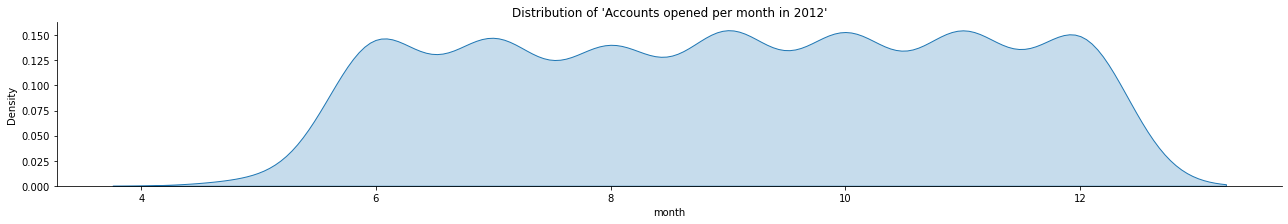

In [502]:
sns.FacetGrid(df_2012, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of 'Accounts opened per month in 2012'")
plt.show()

In [503]:
avg_2012 = df_2012.month.value_counts().to_frame().reset_index()
avg_2012.rename(columns={'month':'total_accounts_opened', 'index':'month'}, inplace=True)
avg_2012['percentage'] = avg_2012.total_accounts_opened/df_2012.shape[0] * 100

avg_2012

,month,total_accounts_opened,percentage
0,12,412,14.730068
1,9,409,14.622810
2,11,406,14.515552
3,10,401,14.336789
4,6,401,14.336789
5,7,387,13.836253
6,8,365,13.049696
7,5,16,0.572041


In [504]:
avgpie_2012 = avg_2012.percentage.sum()/avg_2012.month.nunique()
avgpie_2012

12.5

Text(0.5, 1.0, 'Number of Accounts Opened per Month in 2012')

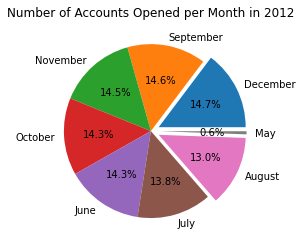

In [505]:
label = ['December', 'September', 'November','October', 'June', 'July', 'August', 'May']
df_2012.month.value_counts().plot(kind='pie', labels=label, autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0, 0, 0.1, 0.1))
plt.ylabel('')
plt.title('Number of Accounts Opened per Month in 2012')

#Finding Adopted user

In [506]:
d2

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [507]:
# Convert time stamp column to date time format
d2.time_stamp = pd.to_datetime(d2.time_stamp)

In [508]:
# Extracting year-week combination for every date
d2['year_week'] = d2['time_stamp'].dt.strftime("%Y-%U")

In [509]:
# time
d2['time'] = d2['time_stamp'].dt.strftime('%H.%M')
# year
d2['year'] = d2['time_stamp'].dt.year
# month
d2['month'] = d2['time_stamp'].dt.month

In [510]:
d2

,time_stamp,user_id,visited,year_week,time,year,month
0,2014-04-22 03:53:30,1,1,2014-16,03.53,2014,4
1,2013-11-15 03:45:04,2,1,2013-45,03.45,2013,11
2,2013-11-29 03:45:04,2,1,2013-47,03.45,2013,11
3,2013-12-09 03:45:04,2,1,2013-49,03.45,2013,12
4,2013-12-25 03:45:04,2,1,2013-51,03.45,2013,12
...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-35,06.14,2013,9
207913,2013-01-15 18:28:37,11997,1,2013-02,18.28,2013,1
207914,2014-04-27 12:45:16,11998,1,2014-17,12.45,2014,4
207915,2012-06-02 11:55:59,11999,1,2012-22,11.55,2012,6


In [511]:
d2.year_week.value_counts()

2014-19    4809
2014-20    4804
2014-18    4747
2014-17    4663
2014-16    4483
           ... 
2012-27     123
2012-25      96
2012-24      95
2012-23      72
2012-22      19
Name: year_week, Length: 108, dtype: int64

In [512]:
# Find Frequency of users login time
df = d2.groupby(['year_week','user_id','time'])['time_stamp'].count().reset_index(name="freq")
df.head(10)

,year_week,user_id,time,freq
0,2012-22,1693,21.58,1
1,2012-22,1995,13.14,1
2,2012-22,2120,21.42,1
3,2012-22,3428,15.47,1
4,2012-22,3514,00.28,1
5,2012-22,3721,09.08,1
6,2012-22,4584,06.37,1
7,2012-22,6102,00.17,1
8,2012-22,7170,06.23,1
9,2012-22,7286,09.39,1


In [513]:
# Adopted users
adopted_users_df = df[df.freq >= 3]
adopted_users_df

,year_week,user_id,time,freq
89,2012-24,728,16.04,3
182,2012-25,1693,21.58,3
204,2012-25,4835,03.07,3
315,2012-26,6171,02.05,3
340,2012-26,9312,11.49,3
...,...,...,...,...
69637,2014-22,11762,23.00,3
69639,2014-22,11806,09.48,3
69640,2014-22,11836,02.40,3
69644,2014-22,11895,04.14,4


In [514]:
adopted_users_df['time'] = adopted_users_df['time'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [515]:
def time_period(df):
    if df.time >=0 and df.time <3:
        return 'middle of night'
    elif df.time >= 3 and df.time <6:
        return 'early morning'
    elif df.time >= 6 and df.time <9:
        return 'morning'
    elif df.time >=9 and df.time <12:
        return 'late morning'
    elif df.time >= 12 and df.time <15:
        return 'midday-noon'
    elif df.time >= 15 and df.time <18:
        return 'afternoon'
    elif df.time >= 18 and df.time < 21:
        return 'evening'
    elif df.time >= 21 and df.time <= 24:
        return 'late evening - midnight'
    
adopted_users_df['time_period'] = adopted_users_df.apply(time_period, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [516]:
adopted_users_df

,year_week,user_id,time,freq,time_period
89,2012-24,728,16.04,3,afternoon
182,2012-25,1693,21.58,3,late evening - midnight
204,2012-25,4835,3.07,3,early morning
315,2012-26,6171,2.05,3,middle of night
340,2012-26,9312,11.49,3,late morning
...,...,...,...,...,...
69637,2014-22,11762,23.00,3,late evening - midnight
69639,2014-22,11806,9.48,3,late morning
69640,2014-22,11836,2.40,3,middle of night
69644,2014-22,11895,4.14,4,early morning


In [517]:
adopted_users_df.to_csv("Adopted_users.csv")